In [4]:
%matplotlib inline
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay as cmd

In [5]:
df = pd.read_csv('../../Datasets/reviews.csv', encoding='ISO-8859-1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [7]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [8]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

In [18]:
vectorizer = CountVectorizer(ngram_range=(1,2),min_df=20)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [20]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

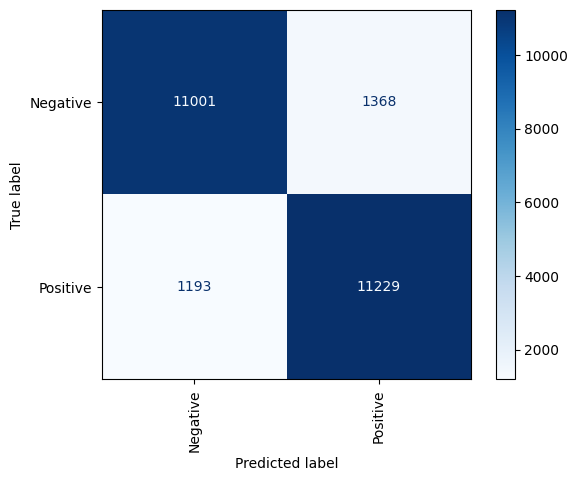

In [21]:
cmd.from_estimator(model, x_test, y_test, display_labels=['Negative','Positive'],
                   cmap = 'Blues', xticks_rotation='vertical')

In [22]:
text = 'Sometimes maybe good sometimes maybe shit'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.6989506606724991

In [23]:
text = 'Not great not terrible'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.32686264025874356

In [24]:
text = 'we\'ve been tripping on shrooms watching this movie and it was a whole new World.'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.42529560042956577